<a href="https://colab.research.google.com/github/vishwanathbeena/appliedai_practice/blob/main/6_Assignment_NB_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [148]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [149]:
data = pd.read_csv('/content/gdrive/MyDrive/Applied_AI_Assignments/data/Donor_data/preprocessed_data.csv')

In [150]:
data.shape

(109248, 9)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [151]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [152]:
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'],axis=1)

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,stratify=y)

In [154]:
print(x_train.columns)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')



#1.3 Make Data Model Ready: encoding eassay, and project_title

#Encoding Essay using BOW

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vector = CountVectorizer(min_df=10)
cnt_vector.fit(x_train['essay'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [156]:
x_test_bow_values = cnt_vector.transform(x_test['essay'].values)
x_train_bow_values = cnt_vector.transform(x_train['essay'].values)

In [157]:
print(x_test_bow_values.shape)
print(x_train_bow_values.shape)
print(len(bow_vector.get_feature_names()))

(36052, 14272)
(73196, 14272)
14220


#Encoding essay using TF-IDF Vectorizer


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
tfidf_vectorizer.fit(x_train['essay'])

In [158]:
x_test_tf_idf_values = tfidf_vectorizer.transform(x_test['essay'].values)
x_train_tf_idf_values = tfidf_vectorizer.transform(x_train['essay'].values)

In [159]:
print(x_test_tf_idf_values.shape)
print(x_train_tf_idf_values.shape)
print(len(tfidf_vector.get_feature_names()))

(36052, 146850)
(73196, 146850)
146850


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [160]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.preprocessing import Normalizer  
features = []  
def encode_categorical_feature(train_dataframe,test_dataframe,feature):
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(train_dataframe[feature])
    count_vectorizer_train_transform = count_vectorizer.transform(train_dataframe[feature].values)
    count_vectorizer_test_transform = count_vectorizer.transform(test_dataframe[feature].values)
    features.extend(count_vectorizer.get_feature_names())
    return count_vectorizer_train_transform,count_vectorizer_test_transform
def encod_numerical_feature(train_dataframe,test_dataframe,feature):
    normalizer  = Normalizer()
    normalizer.fit(train_dataframe[feature].values.reshape(1,-1))
    x_train_normalized = normalizer.transform(train_dataframe[feature].values.reshape(1,-1))
    x_test_normalized = normalizer.transform(test_dataframe[feature].values.reshape(1,-1))
    return x_train_normalized.reshape(-1,1),x_test_normalized.reshape(-1,1)


In [161]:
x_train_state,x_test_state = encode_categorical_feature(x_train,x_test,'school_state')
x_train_teacher_prefix,x_test_teacher_prefix = encode_categorical_feature(x_train,x_test,'teacher_prefix')
x_train_grade,x_test_grade = encode_categorical_feature(x_train,x_test,'project_grade_category')
x_train_categories,x_test_categories = encode_categorical_feature(x_train,x_test,'clean_categories')
x_train_sub_categories,x_test_sub_categories = encode_categorical_feature(x_train,x_test,'clean_subcategories')

In [162]:
x_train_price,x_test_price = encod_numerical_feature(x_train,x_test,'price')
x_train_previous_projects,x_test_previous_projects = encod_numerical_feature(x_train,x_test,'teacher_number_of_previously_posted_projects')


In [163]:
print(x_train_price.shape,x_test_price.shape)
print(x_train_previous_projects.shape,x_test_previous_projects.shape)
print(x_train_state.shape,x_test_state.shape)
#print(x_train_price[0][:5])
#print(x_test_price[0][:5])

(73196, 1) (36052, 1)
(73196, 1) (36052, 1)
(73196, 51) (36052, 51)


#Bow Data

In [164]:
from scipy.sparse import hstack
x_train_bow_data = hstack((x_train_bow_values,x_train_state,x_train_teacher_prefix,x_train_grade,x_train_categories,x_train_sub_categories,x_train_price,x_train_previous_projects))
x_test_bow_data = hstack((x_test_bow_values,x_test_state,x_test_teacher_prefix,x_test_grade,x_test_categories,x_test_sub_categories,x_test_price,x_test_previous_projects))


#TF_IDF Data


> Indented block



In [165]:
x_train_tfidf_data = hstack((x_train_tf_idf_values,x_train_state,x_train_teacher_prefix,x_train_grade,x_train_categories,x_train_sub_categories,x_train_price,x_train_previous_projects))
x_test_tfidf_data = hstack((x_test_tf_idf_values,x_test_state,x_test_teacher_prefix,x_test_grade,x_test_categories,x_test_sub_categories,x_test_price,x_test_previous_projects))

In [166]:
print(x_train_bow_data.shape)
print(x_test_bow_data.shape)
print('*'*50)
print(x_train_tfidf_data.shape)
print(x_test_tfidf_data.shape)

(73196, 14373)
(36052, 14373)
**************************************************
(73196, 146951)
(36052, 146951)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [167]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [168]:
import sklearn
sklearn.metrics.SCORERS.keys()
#To get what scoring parameters can be sent to Gird/RandomSearchCV strategies.

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB

<h3>1.5.1 Naive-Bayes on BOW Data<h3>

In [170]:
hyper_params = {}
hyper_params['alpha'] = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
#hyper_params['class_prior'] = [[0.5,0.5],[0.75,0.25]]
nb = MultinomialNB()
search = GridSearchCV(nb,hyper_params,cv=5,scoring='roc_auc',return_train_score=True)
result = search.fit(x_train_bow_data,y_train)

In [171]:
print(x_train_bow_data.shape)
print(x_test_bow_data.shape)


(73196, 14373)
(36052, 14373)


In [172]:
cv_mean_test_scores = result.cv_results_['mean_test_score']
cv_mean_train_score = result.cv_results_['mean_train_score']
alpha_values = [i['alpha'] for i in result.cv_results_['params']]
alpha_values_str = [str(i) for i in alpha_values]

print(cv_mean_test_scores)
print(alpha_values)

print(result.best_estimator_)
print(result.best_score_)
bow_best_alpha = result.best_params_['alpha']
print(bow_best_alpha)


[0.67726981 0.68768062 0.68303858 0.69464059 0.68976393 0.70093303
 0.69666914 0.70242447 0.70382821 0.70214136 0.68205503 0.66411723
 0.58803925 0.50790271]
[1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
0.7038282111167782
0.5


[]

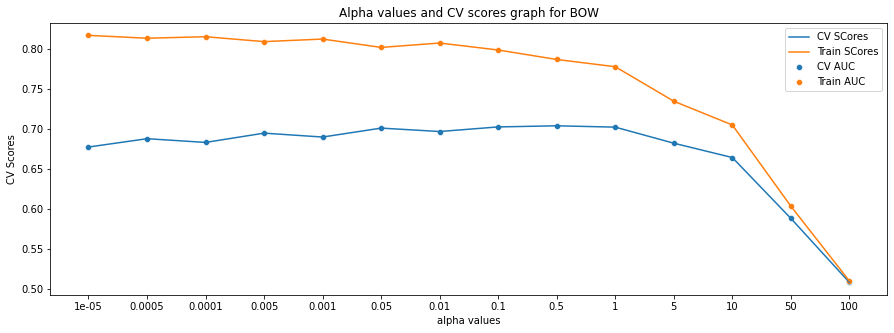

In [173]:
plt.figure(figsize=(15,5))
sns.lineplot(x=alpha_values_str,y=cv_mean_test_scores,label='CV SCores')
sns.lineplot(x=alpha_values_str,y=cv_mean_train_score,label='Train SCores')
sns.scatterplot(x=alpha_values_str,y=cv_mean_test_scores,label='CV AUC')
sns.scatterplot(x=alpha_values_str,y=cv_mean_train_score,label='Train AUC')
plt.xlabel('alpha values')
plt.ylabel('CV Scores')
plt.xticks(alpha_values_str)
plt.legend()
plt.title('Alpha values and CV scores graph for BOW')
plt.plot()

[]

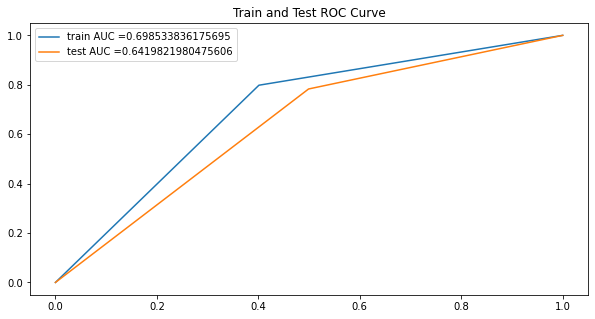

In [174]:
from sklearn.metrics import roc_curve,auc
train_pred = search.predict(x_train_bow_data)
test_pred = search.predict(x_test_bow_data)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_pred)
plt.figure(figsize=(10,5))
sns.lineplot(x=train_fpr,y=train_tpr,label="train AUC ="+str(auc(train_fpr, train_tpr)))
sns.lineplot(x=test_fpr,y=test_tpr,label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.title('Train and Test ROC Curve')
plt.plot()


[]

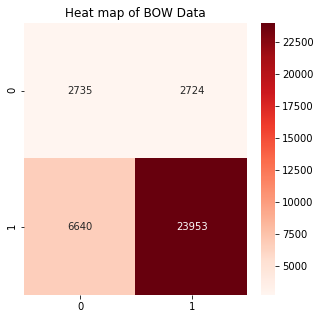

In [175]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,cmap='Reds',annot=True,fmt='d')
plt.title('Heat map of BOW Data')
plt.plot()

<h3>1.5.2 Naive-Bayes on TF_IDF Data</h3>

In [176]:
hyper_params_TFIDF = {}
hyper_params_TFIDF['alpha'] = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
#hyper_params['class_prior'] = [[0.5,0.5],[0.75,0.25]]
nb_TFIDF = MultinomialNB()
search_TFIDF = GridSearchCV(nb_TFIDF,hyper_params_TFIDF,cv=5,scoring='roc_auc',return_train_score=True)
result_TFIDF = search_TFIDF.fit(x_train_tfidf_data,y_train)
cv_mean_test_scores = result_TFIDF.cv_results_['mean_test_score']
cv_mean_train_score = result_TFIDF.cv_results_['mean_train_score']
alpha_values = [i['alpha'] for i in result_TFIDF.cv_results_['params']]
alpha_values_str = [str(i) for i in alpha_values]


print(cv_mean_test_scores)
print(alpha_values)

print(result_TFIDF.best_estimator_)
print(result_TFIDF.best_score_)
tf_idf_best_alpha = result_TFIDF.best_params_['alpha']
print(tf_idf_best_alpha)

[0.64705119 0.66631659 0.65750722 0.68016979 0.67045531 0.68779
 0.68389919 0.68468408 0.65286123 0.62882913 0.57861282 0.56601588
 0.54752748 0.54119492]
[1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)
0.6877900035731557
0.05


[]

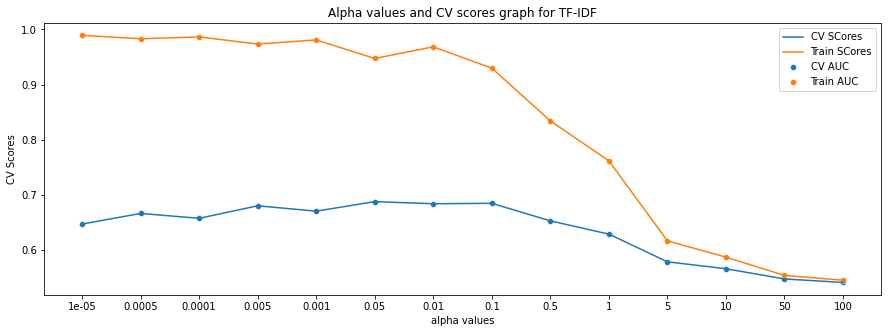

In [177]:
plt.figure(figsize=(15,5))
sns.lineplot(x=alpha_values_str,y=cv_mean_test_scores,label='CV SCores')
sns.lineplot(x=alpha_values_str,y=cv_mean_train_score,label='Train SCores')
sns.scatterplot(x=alpha_values_str,y=cv_mean_test_scores,label='CV AUC')
sns.scatterplot(x=alpha_values_str,y=cv_mean_train_score,label='Train AUC')
plt.xlabel('alpha values')
plt.ylabel('CV Scores')
plt.xticks(alpha_values_str)
plt.legend()
plt.title('Alpha values and CV scores graph for TF-IDF')
plt.plot()

[]

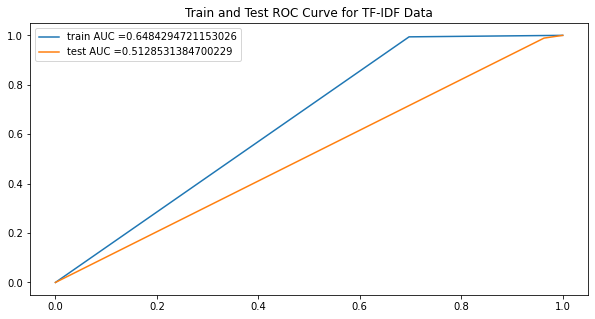

In [178]:
from sklearn.metrics import roc_curve,auc
train_pred_tfidf = search_TFIDF.predict(x_train_tfidf_data)
test_pred_tfidf = search_TFIDF.predict(x_test_tfidf_data)
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train,train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, test_pred_tfidf)
plt.figure(figsize=(10,5))
sns.lineplot(x=train_fpr_tfidf,y=train_tpr_tfidf,label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
sns.lineplot(x=test_fpr_tfidf,y=test_tpr_tfidf,label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.title('Train and Test ROC Curve for TF-IDF Data')
plt.plot()


[]

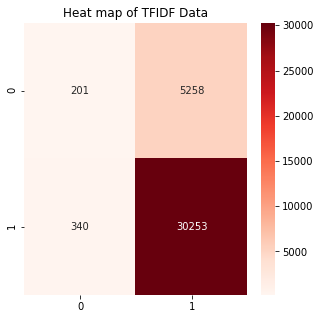

In [179]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, test_pred_tfidf)
plt.figure(figsize=(5,5))
sns.heatmap(cm,cmap='Reds',annot=True,fmt='d')
plt.title('Heat map of TFIDF Data')
plt.plot()

<h3>1.5.3 TF-IDF Feature importance </h3>

In [180]:
fitted_MNB = search_TFIDF.best_estimator_
positive_prob = fitted_MNB.feature_log_prob_[1]
negative_prob = fitted_MNB.feature_log_prob_[0]

print(len(tfidf_vectorizer.get_feature_names()))
print(len(features))
print(features)


146850
99
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy', 'dr', 'mr', 'mrs', 'ms', 'teacher', 'grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2', 'appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth', 'appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performing

In [181]:
features.append('price')
features.append('teacher_number_of_previously_posted_projects')


In [182]:
final_features = []
final_features.extend(tfidf_vectorizer.get_feature_names())
final_features.extend(features)

In [190]:
print(final_features[:30])
print(len(final_features))

['00', '00 pm', '000', '000 000', '000 books', '000 people', '000 residents', '000 steps', '000 students', '000 words', '00am', '00pm', '10', '10 000', '10 11', '10 12', '10 13', '10 15', '10 20', '10 african', '10 asian', '10 blocks', '10 books', '10 boys', '10 children', '10 chrome', '10 chromebooks', '10 class', '10 copies', '10 different']
146951


In [191]:
import numpy as np
dict = {'feture_names':final_features,'pos_prob':positive_prob,'neg_prob':negative_prob}
feature_importance_df = pd.DataFrame(dict)
top_pos_features = feature_importance_df.sort_values(by=['pos_prob'],ascending=False)
top_neg_features = feature_importance_df.sort_values(by=['neg_prob'],ascending=False)
top_pos_features.head(20)



,feture_names,pos_prob,neg_prob
146903,mrs,-3.574813,-3.638815
146914,literacy_language,-3.654183,-3.803658
146909,grades_prek_2,-3.840224,-3.840687
146915,math_science,-3.913419,-3.873425
146904,ms,-3.973205,-3.947199
146906,grades_3_5,-4.015650,-4.081465
146936,literacy,-4.086450,-4.293580
146938,mathematics,-4.296570,-4.293580
146937,literature_writing,-4.514211,-4.613937
146907,grades_6_8,-4.799090,-4.771515


In [192]:
top_neg_features.head(20)

,feture_names,pos_prob,neg_prob
146903,mrs,-3.574813,-3.638815
146914,literacy_language,-3.654183,-3.803658
146909,grades_prek_2,-3.840224,-3.840687
146915,math_science,-3.913419,-3.873425
146904,ms,-3.973205,-3.947199
146906,grades_3_5,-4.015650,-4.081465
146938,mathematics,-4.296570,-4.293580
146936,literacy,-4.086450,-4.293580
146937,literature_writing,-4.514211,-4.613937
146907,grades_6_8,-4.799090,-4.771515


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions
<br> based on AUC scores of tst data set for BOW and TF-IDF, BOW gave better results with alpha as 1.I believe This is becasue naive-Bayes is probability based approachin count vectorizer, we get feature vector based on count,tis can be converted to probability very easily.It is simply using this count and dividing by number of words in positive/negative .

In [185]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Best Alpha ","Test AUC"]
x.add_row(["BOW","Multinomial NB",bow_best_alpha,str(auc(test_fpr, test_tpr))])
x.add_row(["TF_IDF","Multinomial NB",tf_idf_best_alpha,str(auc(test_fpr_tfidf, test_tpr_tfidf))])
print(x)

+------------+----------------+-------------+--------------------+
| Vectorizer |     Model      | Best Alpha  |      Test AUC      |
+------------+----------------+-------------+--------------------+
|    BOW     | Multinomial NB |     0.5     | 0.6419821980475606 |
|   TF_IDF   | Multinomial NB |     0.05    | 0.5128531384700229 |
+------------+----------------+-------------+--------------------+


#Experimenting with various Hyper parameters using BOW vector representation

In [186]:
hyper_param_dict = {}
hyper_param_dict['alpha'] = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
hyper_param_dict['class_prior'] = [[0.5,0.5],[0.25,0.75],[0.75,0.25],[0.6,0.4]]
mnb = MultinomialNB()
search = GridSearchCV(mnb,hyper_param_dict,scoring='roc_auc',return_train_score=True)
results = search.fit(x_train_bow_data,y_train)

In [187]:
print(results.best_params_)
print(results.best_score_)

{'alpha': 0.5, 'class_prior': [0.25, 0.75]}
0.7038280985451698


In [188]:
predicted = search.predict(x_test_bow_data)
test_fpr1,test_tpr1,test_threshold1 = roc_curve(y_test,predicted)
print(auc(test_fpr1,test_tpr1))

0.6495447438438682
